In [42]:
%matplotlib inline

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [44]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

In [45]:
credit_df = pd.read_csv("credit.csv")

In [46]:
credit_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
phone                   1000 non-null object
default                 1000 non-null object
dtypes: int64(7), object(10)
memory usage: 132.9+ KB


In [47]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in credit_df.columns: # Loop through all columns in the dataframe
    if credit_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        credit_df[feature] = pd.Categorical(credit_df[feature]).codes # Replace strings with an integer

In [48]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null int8
months_loan_duration    1000 non-null int64
credit_history          1000 non-null int8
purpose                 1000 non-null int8
amount                  1000 non-null int64
savings_balance         1000 non-null int8
employment_duration     1000 non-null int8
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null int8
housing                 1000 non-null int8
existing_loans_count    1000 non-null int64
job                     1000 non-null int8
dependents              1000 non-null int64
phone                   1000 non-null int8
default                 1000 non-null int8
dtypes: int64(7), int8(10)
memory usage: 64.5 KB


col_labels = [ 'checking_balance', 'months_loan_duration' ,'credit_history' , 'purpose, amount', 'savings_balance' , 'employment_duration'
, 'percent_of_income', 'years_at_residence', 'age', 'other_credit', 'housing', 'existing_loans_count', 'job', 'dependents', 'phone', 'default']

train_char_label = ['No', 'Yes']

In [49]:
# splitting data into training and test set for independent attributes

#train_set = credit_df.head(500) # Up to the last initial training set row
#test_set = credit_df.tail(500) # Past the last initial training set row

# capture the target column ("default") into separate vectors for training set and test set
#train_labels = train_set.pop("default")
#test_labels = test_set.pop("default")


array = credit_df.values
X = array[:,:-1] # select all rows and first 4 columns which are the attributes
y = array[:,-1] 

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.25, random_state=1)

In [50]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

#dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)
                                  
dt_model = DecisionTreeClassifier(criterion = 'entropy' , random_state=1)

In [51]:
dt_model.fit(train_set, train_labels )

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [52]:
dt_model.score(test_set , test_labels)

0.712

In [53]:
dt_model.score(train_set, train_labels)   # to demonstrate that it is overfit

1.0

Regularising the Decision Tree

In [54]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state=1 )
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [55]:
print("Regularized DT is right fit    ")

print(dt_model.score(train_set , train_labels))

print(dt_model.score(test_set , test_labels))

Regularized DT is right fit    
0.7506666666666667
0.708


# Ensemble Learning 

## Bagging

In [56]:
credit_labels = credit_df.pop("default")

In [57]:
# In the following lines, we call the bagging classifer with oob_score (out of bag score) set to true which false by default
# This makes the baggingclassifier use the 37% unused data for testing
# Compare the performance of the BGCL with regularized dt above. 
# Though not required, you can keep separate test data (outside the bootstrap sampling) on which we test the BGCL
# 

from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=100, max_samples=.50 , oob_score=True)

bgcl = bgcl.fit(credit_df, credit_labels)

print(bgcl.oob_score_)

0.758


## AdaBoosting

In [58]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier(n_estimators=50)
abcl = abcl.fit(train_set, train_labels)


In [59]:
# print(abcl.oob_score_)   # Adaboost does not have OOB Score attribute

test_pred = abcl.predict(test_set)
abcl.score(test_set , test_labels)

0.728

## GradientBoost

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(train_set, train_labels)

In [61]:
# print(gbcl.oob_score_)   # Gradientboost does not have OOB Score attribute


test_pred = gbcl.predict(test_set)
gbcl.score(test_set , test_labels)

0.736

## RandomForest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(train_set, train_labels)

In [63]:
# To keep it comparable with boosting algorithms... it supports oob score

test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

0.764

# ROC AUC for Ensemble

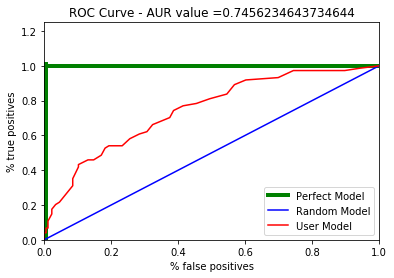

In [27]:
#importing libraries
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn import metrics



def roccurve(y_values, y_preds_proba):
    fpr, tpr, _ = metrics.roc_curve(y_values, y_preds_proba)
    xx = np.arange(101) / float(100)
    aur = metrics.auc(fpr,tpr)
    plt.xlim(0, 1.0)
    plt.ylim(0, 1.25)
    plt.plot([0.0, 0.0], [0.0, 1.0], color='green', linewidth=8)
    plt.plot([0.0, 1.0], [1.0, 1.0], color='green', label='Perfect Model', linewidth=4)
    plt.plot(xx,xx, color='blue', label='Random Model')
    plt.plot(fpr,tpr, color='red', label='User Model')
    plt.title("ROC Curve - AUR value ="+str(aur))
    plt.xlabel('% false positives')
    plt.ylabel('% true positives')
    plt.legend()
    plt.show()




rfcl_test_pred_proba = rfcl.predict_proba(X=test_set)
roccurve(y_values=test_labels, y_preds_proba=rfcl_test_pred_proba[:,1])



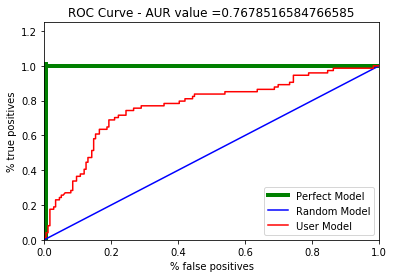

In [30]:
#importing libraries
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn import metrics



def roccurve(y_values, y_preds_proba):
    fpr, tpr, _ = metrics.roc_curve(y_values, y_preds_proba)
    xx = np.arange(101) / float(100)
    aur = metrics.auc(fpr,tpr)
    plt.xlim(0, 1.0)
    plt.ylim(0, 1.25)
    plt.plot([0.0, 0.0], [0.0, 1.0], color='green', linewidth=8)
    plt.plot([0.0, 1.0], [1.0, 1.0], color='green', label='Perfect Model', linewidth=4)
    plt.plot(xx,xx, color='blue', label='Random Model')
    plt.plot(fpr,tpr, color='red', label='User Model')
    plt.title("ROC Curve - AUR value ="+str(aur))
    plt.xlabel('% false positives')
    plt.ylabel('% true positives')
    plt.legend()
    plt.show()




gbcl_test_pred_proba = gbcl.predict_proba(X=test_set)
roccurve(y_values=test_labels, y_preds_proba=gbcl_test_pred_proba[:,1])


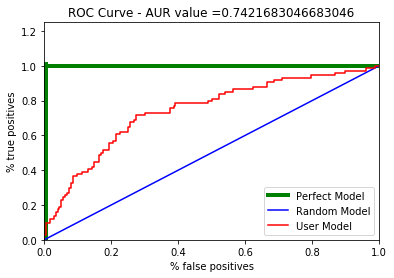

In [31]:
#importing libraries
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn import metrics



def roccurve(y_values, y_preds_proba):
    fpr, tpr, _ = metrics.roc_curve(y_values, y_preds_proba)
    xx = np.arange(101) / float(100)
    aur = metrics.auc(fpr,tpr)
    plt.xlim(0, 1.0)
    plt.ylim(0, 1.25)
    plt.plot([0.0, 0.0], [0.0, 1.0], color='green', linewidth=8)
    plt.plot([0.0, 1.0], [1.0, 1.0], color='green', label='Perfect Model', linewidth=4)
    plt.plot(xx,xx, color='blue', label='Random Model')
    plt.plot(fpr,tpr, color='red', label='User Model')
    plt.title("ROC Curve - AUR value ="+str(aur))
    plt.xlabel('% false positives')
    plt.ylabel('% true positives')
    plt.legend()
    plt.show()




abcl_test_pred_proba = abcl.predict_proba(X=test_set)
roccurve(y_values=test_labels, y_preds_proba=abcl_test_pred_proba[:,1])


In [38]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=100, max_samples=.50 , oob_score=True , random_state=1)

bgcl = bgcl.fit(train_set, train_labels)

print(bgcl.oob_score_)

0.7653333333333333


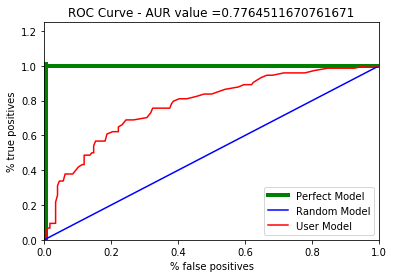

In [39]:
#importing libraries
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn import metrics



def roccurve(y_values, y_preds_proba):
    fpr, tpr, _ = metrics.roc_curve(y_values, y_preds_proba)
    xx = np.arange(101) / float(100)
    aur = metrics.auc(fpr,tpr)
    plt.xlim(0, 1.0)
    plt.ylim(0, 1.25)
    plt.plot([0.0, 0.0], [0.0, 1.0], color='green', linewidth=8)
    plt.plot([0.0, 1.0], [1.0, 1.0], color='green', label='Perfect Model', linewidth=4)
    plt.plot(xx,xx, color='blue', label='Random Model')
    plt.plot(fpr,tpr, color='red', label='User Model')
    plt.title("ROC Curve - AUR value ="+str(aur))
    plt.xlabel('% false positives')
    plt.ylabel('% true positives')
    plt.legend()
    plt.show()




bgcl_test_pred_proba = bgcl.predict_proba(X=test_set)
roccurve(y_values=test_labels, y_preds_proba=bgcl_test_pred_proba[:,1])


# Related to First GBCL

In [28]:
#Long Term performance on OOB data rather than a separate dataset
bgcl = BaggingClassifier(n_estimators=500, max_samples=.50 , oob_score=True)

values = credit_df.values  # This is already done, showing it here for ease of reference



# configure bootstrap
n_iterations = 100       # Number of bootstrap samples to create
n_size = int(len(values) * 1)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):

	bgcl.fit(values[:,:-1], values[:,-1])
	score = bgcl.oob_score_
	print(score)
	stats.append(score)


0.716
0.731
0.728
0.723
0.728
0.732
0.739
0.727
0.721
0.737
0.734
0.732
0.731
0.732
0.73
0.731
0.721
0.731
0.725
0.731
0.724
0.726
0.723
0.727
0.726
0.732
0.73
0.73
0.726
0.731
0.727
0.729
0.728
0.726
0.729
0.724
0.733
0.728
0.734
0.728
0.72
0.724
0.729
0.717
0.72
0.734
0.722
0.736
0.724
0.737
0.729
0.726
0.724
0.727
0.731
0.73
0.731
0.723
0.726
0.72
0.735
0.728
0.728
0.727
0.728
0.728
0.727
0.724
0.736
0.73
0.727
0.723
0.727
0.725
0.726
0.728
0.727
0.729
0.731
0.733
0.726
0.73
0.731
0.725
0.729
0.725
0.734
0.728
0.733
0.731
0.732
0.721
0.724
0.726
0.731
0.73
0.72
0.737
0.736
0.731


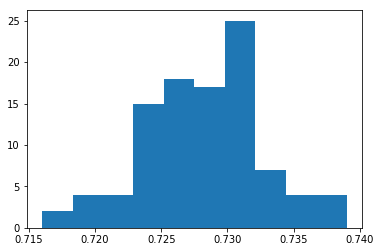

95.0 confidence interval 72.0% and 73.7%


In [29]:
from matplotlib import pyplot

# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

Make histograms for other classifier also